## Forage data internship 

Name: Soyinka 'Sho' Sowoolu

email: soyinkas1@gmail.com

## ANZ- Exploratory Data Analysis (Mandatory Task)

### <u>Background Information</u>

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

#### <u>Work plan</u>

This is what we will be trying to achieve the following on this task:
1. Import all the primarily required python librairies and import the data into a pandas DataFrame
2. Check the general information on the data such as datatypes (strings, integers, floats, datetime etc), number of rows, number of columns/features, number of missing values
3. Determine what type of data structure/analysis challenge we have (time-series or cross-sectional datasets for a single moment of time?)
4. Carry out descriptive statistics on the numerical values and any inferences from the non-numerical values
5. Data cleanup and transformations required e.g treatment of missing data, outliers, index etc.
6. Get interesting insights /KPIs such as :
    * Average, lowest and/or highest transaction amount
    * Types of transactions and count of each
    * Top 10 customers by transaction volumes (spend and count of transactions)
    * Top 10 customers by location
    * Transaction trends per periods (weekly & monthly)- spend, number of customers etc.
    * Top Merchants by transaction volumes
    * Any other interesting insights from the data
    

### 1. Import `Python` libraries and dataset into notebook

In [2]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
# Import the dataset into the notebook
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [5]:
# Create a backup copy of the DataFrame
df_copy=df.copy()

### 2. Check out general information about the dataset

In [10]:
df.head(40)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


In [11]:
df.tail()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit
12042,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,...,31,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit


In [12]:
# Explore the names of the columns (features)
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

>We will write a function to get the unique values of the non_numerical columns. This will help to get an understanding of what they represent.

In [19]:
# Function to get the unique values in a column. 

def get_distinct_val(column):
    value = df[column].unique()
    return value

In [117]:
# Check the columns for each of their unique values 

# Get the distinct value for all columns into a dictionary
col_vals={}

# iterate through the columns 
for column in df.columns:
    if not df[column].dtype.kind in 'iufc':
        col_vals.update({column:[get_distinct_val(column),df[column].nunique()]})

# Show the columns and distinct values as a DataFrame
col_vals

{'status': [array(['authorized', 'posted'], dtype=object), 2],
 'bpay_biller_code': [array([nan, 0, ' THE DISCOUNT CHEMIST GROUP',
         ' LAND WATER & PLANNING East Melbourne'], dtype=object),
  3],
 'account': [array(['ACC-1598451071', 'ACC-1222300524', 'ACC-1037050564',
         'ACC-1608363396', 'ACC-2776252858', 'ACC-182446574',
         'ACC-602667573', 'ACC-2171593283', 'ACC-588564840',
         'ACC-1496451953', 'ACC-1903037542', 'ACC-2014856841',
         'ACC-4163822186', 'ACC-3954677887', 'ACC-4258502723',
         'ACC-2890243754', 'ACC-3481401842', 'ACC-2615038700',
         'ACC-966140392', 'ACC-354106658', 'ACC-1443681913',
         'ACC-1710017148', 'ACC-2673069055', 'ACC-3485804958',
         'ACC-3100725361', 'ACC-1990648130', 'ACC-154431271',
         'ACC-3689607373', 'ACC-721712940', 'ACC-1799207998',
         'ACC-2107684084', 'ACC-2173390920', 'ACC-1243371644',
         'ACC-1683215619', 'ACC-2901672282', 'ACC-1652235822',
         'ACC-414431115', 'ACC-133481

**From the above, We will try our best to create a data dictionary for description of the non_numerical column labels:**

1. status: The current status of the transaction( `authorized` or `posted`)
2. bpay_biller_code: Code for bill collector (Only two notable classes while most have value of 0 or nan)
3. account: Bank account number transaction took place (100 distinct accounts)
4. currency: The currency in which the transaction took place
5. long_lat: Longitude and Latitude of the customer when transaction happened (100 distinct locations)
6. txn_description: The type of transaction(6 distinct types-`POS`,`SALES-POS`,`PAYMENT`,`INTER BANK`,`PAY/SALARY`,`PHONE BANK`)
7. merchant_id: Unique identifier for each merchant a transaction happened with (5725 distinct merchants)
8. first_name: The first name of the customer(80 distinct customers) 
9. date: The dates on which transactions occurred(There are 91 distinct days with transactions)
10. gender: The gender of the customer (`F:female`, `M:Male`)
11. merchant_suburb: The location (suburb) of the merchant (1609 distinct suburbs)
12. merchant_state: The location (state) of the merchant (8 states that transactions happed with merchants)
13. extraction: date and time the data was generated/recorded (transactions happened at 9442 unique times)
14. transaction_id: Unique identifier for each transaction (12,043 transactions took place)
15. country: The country where the transactions took place( `Australia`)
16. customer_id: unique identifier for each customer (100 customers transacted).
17. mechant_long_lat:Longitude and Latitude of the merchant location when transaction happened (2703 distinct locations)
18. movement: the class/funds movement type of transaction (`debit` or `credit`)



In [7]:
# Explore general information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

>We have 23 columns/features  with 12,043 rows in the dataset. There are missing data in the datasets based on the uneven Non-Null counts for the features. The datatypes are strings (object), numbers (float64 & int64) and date and time (datetime64). 

In [8]:
# Explore the numerical and non-numerical (categorical) data and create a DataFrame for these
df_numerical = df.select_dtypes(include=[np.number])
df_numerical.head()

,card_present_flag,merchant_code,balance,age,amount
0,1.0,NaN,35.39,26,16.25
1,0.0,NaN,21.20,26,14.19
2,1.0,NaN,5.71,38,6.42
3,1.0,NaN,2117.22,40,40.90
4,1.0,NaN,17.95,26,3.25


>From the above, the `balance`, `age` and `amount` columns will be the focus of our descriptive statistics analysis since these are the only true numerical values in the datasets.

>Note that while the `card_present_flag` column is of the `float64` datatype it is actually used as a binary categorical data to represent a yes(1) or no (0) to whether a card was present on the transaction.

In [9]:
# Explore the numerical and non-numerical (categorical) data and create a DataFrame for these
df_non_numerical = df.select_dtypes(exclude=[np.number])
df_non_numerical.head()

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,first_name,date,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,2018-08-01,F,Ashmore,QLD,2018-08-01T01:01:15.000+0000,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,2018-08-01,F,Sydney,NSW,2018-08-01T01:13:45.000+0000,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,2018-08-01,M,Sydney,NSW,2018-08-01T01:26:15.000+0000,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2018-08-01,F,Buderim,QLD,2018-08-01T01:38:45.000+0000,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,2018-08-01,F,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit




>The missing values are noticed to be related majorly to the merchant's information. Lets confirm this 

In [10]:
# Check the missing values in the dataset
df.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [11]:
# Create a dataframe the columns(features) with the missing value only
missing_value_columns=[]
num_missing = []
for column in df.columns:
     if df[column].isna().sum()!=0:
        missing_value_columns.append(column)
        num_missing.append(df[column].isna().sum())

missing_values =pd.DataFrame(data=[missing_value_columns,num_missing],
                             index=['column','missing data']).T
missing_values

,column,missing data
0,card_present_flag,4326
1,bpay_biller_code,11158
2,merchant_id,4326
3,merchant_code,11160
4,merchant_suburb,4326
5,merchant_state,4326
6,merchant_long_lat,4326


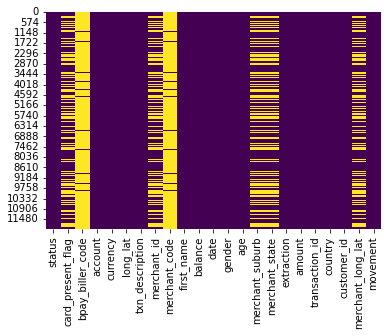

In [12]:
# Visualise the missing data spread in the dataset

# Create a heatmap of the dataframe
sns.heatmap(df.isnull(),cmap='viridis',cbar=False);

The `merchant_code` and `bpay_biller_code` have an almost equal amount of missing values of ~11159 which is ~93% of the entire data instances of 12,043.

In addition, other missing values are related to the merchant as well , the mechant's ID and location information. The missing values of 4,326 is 36% of the entire data instance of 12,043. 

We will make on decision upon further exploration of the data. However,options to explore are:

>**options:**
* We might drop the entire `merchant_code` and `bpay_biller_code`columns entirely and drop the rows with the missing values for the others. This would leave us with a final dataset of 7,717 for analysis.
* We can fill the remaining mechant info which are all objects with a string 'missing' after dropping the `merchant_code` and `bpay_biller_code`columns. This will allow us analyse all the customer's transactions.
* We can also split the dataset for seperate analysis, as it is apparent that some transactions will not have a merchant involved based on the type of transactions discovered (`POS`,`SALES-POS`,`PAYMENT`,`INTER BANK`,`PAY/SALARY`,`PHONE BANK`). `INTER BANK`,`PAY/SALARY`,`PHONE BANK` are likely not going to require a merchant 

### 3.Type of Data Structure/Analysis Required

#### With the date based transactions, we are dealing with a time-series data: 
The dataset will be better analysed as a time-series data to show trends of transaction. We can also use these trends for machine learning to predict future trends as well as identifying transactions that are not in-line with past norms (for fraud prevention). 

The date column is already in the pandas datatime datatype so the task will be to make this the index of the dataframe.

In [13]:
# Make the datetime column the index of the dataframe.
df.set_index('date',inplace=True)
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
2018-08-01,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2018-08-01,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
2018-08-01,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
2018-08-01,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


#### we will carry out some feature engineering on the date component by splitting into weeks and months and adding these as new columns

In [14]:
# Add column for the month of the transaction
df['transaction_month']=pd. DatetimeIndex(df.index).month

In [15]:
# Add column for the week of the week for the transaction
df['week_num'] = pd.DatetimeIndex(df.index).isocalendar().week

In [16]:
# View the new columns
df[['transaction_month','week_num']]

,transaction_month,week_num
date,,
2018-08-01,8,31
2018-08-01,8,31
2018-08-01,8,31
2018-08-01,8,31
2018-08-01,8,31
...,...,...
2018-10-31,10,44
2018-10-31,10,44
2018-10-31,10,44


We will split the dataset based on the type of transactions and can even see how this affects missing values too.

In [145]:
# Create a function to get the some summary information on the transaction types
def get_info_txn_description(label):
    df_label =df[df['txn_description']==label]
    print(label)
    print(f'number of transactions:{len(df_label)}')
    print('null values in the DataFrame:')
    print(df_label.isna().sum())
    print("")

In [146]:
# Information of transaction types
txn_type=['POS','SALES-POS','PAYMENT','INTER BANK','PAY/SALARY','PHONE BANK']
for items in txn_type:
    get_info_txn_description(items)

POS
number of transactions:3783
null values in the DataFrame:
status                  0
card_present_flag       0
bpay_biller_code     3782
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id             0
merchant_code        3783
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb         0
merchant_state          0
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat       0
movement                0
dtype: int64

SALES-POS
number of transactions:3934
null values in the DataFrame:
status                  0
card_present_flag       0
bpay_biller_code     3933
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id             0
merchant_code        3934
first_name              

**Points revealed from the above:**

* `POS` and `SALES-POS` were the only transactions that took place with merchants using cards too (no null values for `merchant_id`and `card_present_flag`)
* `merchant_code` does not related to 'merchants' transactions per se . We will find out further below
* `PAYMENT` are transactions that did not happen with merchant and without card records (null values for `card_present_flag`, `merchant_id`,`merchant_suburb`,`merchant_state`,`merchant_long_lat`)
* `INTER BANK`are transactions that did not happen with merchant and without card records (null values for `card_present_flag`, `merchant_id`,`merchant_suburb`,`merchant_state`,`merchant_long_lat`)
* `PAY/SALARY`are transactions did not happen with merchant and without card records (null values for `card_present_flag`, `merchant_id`,`merchant_suburb`,`merchant_state`,`merchant_long_lat`), however, the `mechant code` and `bpay_biller_code` could be the party paying the salary (no null values for `merchant_code` and `bpay_biller_code`)
* `PHONE BANK`are transactions did not happen with merchant and without card records (null values for `card_present_flag`, `merchant_id`,`merchant_suburb`,`merchant_state`,`merchant_long_lat`) 

So we can analyse transactions by customers directly and those with merchants seperately.

In [167]:
# Create DataFrame for merchants transaction (card transactions)
df_merchants=df[(df['txn_description']=='POS') | (df['txn_description']=='SALES-POS')]
df_merchants

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [169]:
# Check the columns with missing values. This will be dropped for statistical analysis
df_merchants.isna().sum()

status                  0
card_present_flag       0
bpay_biller_code     7715
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id             0
merchant_code        7717
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb         0
merchant_state          0
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat       0
movement                0
dtype: int64

In [187]:
# Create a DataFrame for transactions by the customer directly (without merchants and salary)
df_cust_only=df[(df['txn_description']=='PAYMENT') | 
                (df['txn_description']=='INTER BANK')| 
                (df['txn_description']=='PHONE BANK')]

df_cust_only

,status,card_present_flag,bpay_biller_code,account,currency,txn_description,merchant_id,merchant_code,first_name,balance,...,amount,transaction_id,country,customer_id,merchant_long_lat,movement,c_long,c_lat,mer_long,mer_lat
5,posted,NaN,NaN,ACC-1608363396,AUD,PAYMENT,NaN,NaN,Robert,1705.43,...,163.0,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit,151.22,-33.87,NaN,NaN
9,posted,NaN,NaN,ACC-602667573,AUD,INTER BANK,NaN,NaN,Michael,466.58,...,21.0,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit,151.23,-33.96,NaN,NaN
10,posted,NaN,NaN,ACC-2171593283,AUD,PAYMENT,NaN,NaN,Fernando,4348.50,...,27.0,baff17b27b2643c48c84fca7129e9611,Australia,CUS-2317998716,NaN,debit,146.94,-36.04,NaN,NaN
11,posted,NaN,NaN,ACC-2776252858,AUD,PAYMENT,NaN,NaN,Kristin,1203.75,...,29.0,78a1b6c3a5534d48828d8ed266ba9c2e,Australia,CUS-4123612273,NaN,debit,144.95,-37.76,NaN,NaN
13,posted,NaN,NaN,ACC-588564840,AUD,INTER BANK,NaN,NaN,Isaiah,4438.16,...,25.0,eaafa602902b4f4194efb96a105dd7ab,Australia,CUS-1462656821,NaN,debit,151.27,-33.76,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,posted,NaN,NaN,ACC-2173390920,AUD,PHONE BANK,NaN,NaN,Luis,13537.75,...,67.0,b2c42c27bb24464cb5e3e0ffbf9b1977,Australia,CUS-3180318393,NaN,debit,144.71,-37.58,NaN,NaN
12032,posted,NaN,NaN,ACC-1710017148,AUD,PAYMENT,NaN,NaN,Michelle,20699.90,...,33.0,96fe9c5dcda24b599e81b6f6d5bdcb66,Australia,CUS-883482547,NaN,debit,150.82,-34.01,NaN,NaN
12035,posted,NaN,NaN,ACC-1973887809,AUD,PAYMENT,NaN,NaN,Antonio,9349.51,...,29.0,dda53e538c5b4d5aae2481be22e60440,Australia,CUS-1646621553,NaN,debit,115.78,-31.90,NaN,NaN
12036,posted,NaN,NaN,ACC-1349834573,AUD,PAYMENT,NaN,NaN,Matthew,18127.50,...,32.0,df15d6f039554dcbb3ca02631ce22068,Australia,CUS-1790886359,NaN,debit,145.17,-37.84,NaN,NaN


In [188]:
# Check the columns with missing values. This will be dropped for statistical analysis.

In [189]:
# Create a DataFrame for salary transactions
df_salary =df[(df['txn_description']=='PAY/SALARY') ]
df_salary

,status,card_present_flag,bpay_biller_code,account,currency,txn_description,merchant_id,merchant_code,first_name,balance,...,amount,transaction_id,country,customer_id,merchant_long_lat,movement,c_long,c_lat,mer_long,mer_lat
50,posted,NaN,0,ACC-588564840,AUD,PAY/SALARY,NaN,0.0,Isaiah,8342.11,...,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,151.27,-33.76,NaN,NaN
61,posted,NaN,0,ACC-1650504218,AUD,PAY/SALARY,NaN,0.0,Marissa,2040.58,...,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,145.01,-37.93,NaN,NaN
64,posted,NaN,0,ACC-3326339947,AUD,PAY/SALARY,NaN,0.0,Eric,3158.51,...,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,151.18,-33.80,NaN,NaN
68,posted,NaN,0,ACC-3541460373,AUD,PAY/SALARY,NaN,0.0,Jeffrey,2517.66,...,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,145.00,-37.83,NaN,NaN
70,posted,NaN,0,ACC-2776252858,AUD,PAY/SALARY,NaN,0.0,Kristin,2271.79,...,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,144.95,-37.76,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,posted,NaN,0,ACC-1973887809,AUD,PAY/SALARY,NaN,0.0,Antonio,9378.51,...,1098.91,0e6cffb4401043c891ab7a50ec594208,Australia,CUS-1646621553,NaN,credit,115.78,-31.90,NaN,NaN
12000,posted,NaN,0,ACC-819621312,AUD,PAY/SALARY,NaN,0.0,Michele,3440.01,...,1158.15,ad13e06fffba4771b3c994f9147e68c0,Australia,CUS-1271030853,NaN,credit,145.04,-37.85,NaN,NaN
12001,posted,NaN,0,ACC-2920611728,AUD,PAY/SALARY,NaN,0.0,Tyler,11381.44,...,1043.12,14a1604e6ead4b54b65d7a28ec546a69,Australia,CUS-1388323263,NaN,credit,144.96,-37.76,NaN,NaN
12003,posted,NaN,0,ACC-1799207998,AUD,PAY/SALARY,NaN,0.0,Susan,11454.52,...,1395.49,cd1b1dea1d2f43e882d3499b3717d23b,Australia,CUS-164374203,NaN,credit,150.68,-33.79,NaN,NaN


In [178]:
# Check the columns with missing values. This will be dropped for statistical analysis.
df_salary.isna().sum()

status                 0
card_present_flag    883
bpay_biller_code       0
account                0
currency               0
long_lat               0
txn_description        0
merchant_id          883
merchant_code          0
first_name             0
balance                0
date                   0
gender                 0
age                    0
merchant_suburb      883
merchant_state       883
extraction             0
amount                 0
transaction_id         0
country                0
customer_id            0
merchant_long_lat    883
movement               0
dtype: int64

In [179]:
df_salary['movement'].unique(),df_cust_only['movement'].unique(),df_merchants['movement'].unique()

(array(['credit'], dtype=object),
 array(['debit'], dtype=object),
 array(['debit'], dtype=object))

The only credit transactions are the `PAY/SALARY` transactions while other transactions are all debit transactions

### 4. Look at descriptive statistics of the data

In [17]:
# We can now check for some descriptive statistics of the data
df.describe()

,card_present_flag,merchant_code,balance,age,amount,transaction_month,week_num
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588,9.011957,37.401312
std,0.398029,0.0,31503.722652,10.046343,592.599934,0.816511,3.774202
min,0.000000,0.0,0.240000,18.000000,0.100000,8.000000,31.000000
25%,1.000000,0.0,3158.585000,22.000000,16.000000,8.000000,34.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000,9.000000,37.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000,10.000000,41.000000
max,1.000000,0.0,267128.520000,78.000000,8835.980000,10.000000,44.000000


In [181]:
# We can now check for some descriptive statistics of the merchants data
df_merchants.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,0.0,7717.000000,7717.000000,7717.000000
mean,0.802644,NaN,11871.056585,30.052093,40.153732
std,0.398029,NaN,25999.398243,9.439454,149.833070
min,0.000000,NaN,0.240000,18.000000,0.100000
25%,1.000000,NaN,2723.890000,23.000000,12.080000
50%,1.000000,NaN,5286.040000,27.000000,19.700000
75%,1.000000,NaN,10278.290000,38.000000,33.910000
max,1.000000,NaN,267093.660000,78.000000,7081.090000


In [182]:
# We can now check for some descriptive statistics of the customers only data
df_cust_only.describe()

,card_present_flag,merchant_code,balance,age,amount
count,0.0,0.0,3443.000000,3443.000000,3443.000000
mean,NaN,NaN,20659.668556,31.245135,80.406913
std,NaN,NaN,40710.298168,10.610930,166.760121
min,NaN,NaN,8.060000,18.000000,15.000000
25%,NaN,NaN,4288.660000,22.000000,30.000000
50%,NaN,NaN,8517.840000,29.000000,42.000000
75%,NaN,NaN,17495.240000,39.000000,71.500000
max,NaN,NaN,267050.660000,78.000000,1981.000000


In [183]:
# We can now check for some descriptive statistics of the salary data
df_salary.describe()

,card_present_flag,merchant_code,balance,age,amount
count,0.0,883.0,883.000000,883.000000,883.000000
mean,NaN,0.0,16242.859049,32.631937,1898.728029
std,NaN,0.0,30953.342656,12.276731,1150.364621
min,NaN,0.0,735.660000,18.000000,576.000000
25%,NaN,0.0,4309.995000,22.000000,1013.670000
50%,NaN,0.0,7532.540000,30.000000,1626.480000
75%,NaN,0.0,14370.765000,40.000000,2538.680000
max,NaN,0.0,267128.520000,78.000000,8835.980000


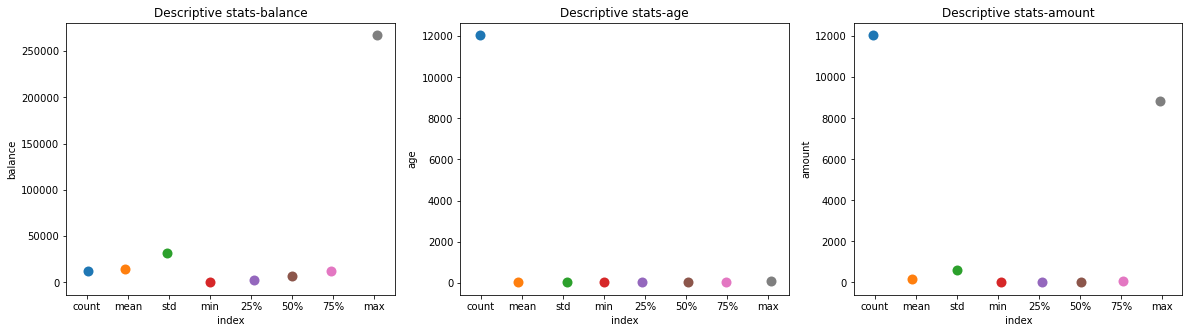

In [18]:
# Visualise the major descriptive statistics by creating subplots

# Setup the subplots
fig,ax = plt.subplots(1,3, figsize=(20,5),sharex=True)

# To remove any unwanted variable from plot
describe_df = df.describe(include=['int64','float64'])
describe_df.reset_index(inplace=True)
describe_df =describe_df.loc[:, describe_df.columns.str.contains('index')| 
                             describe_df.columns.str.contains('balance')| 
                             describe_df.columns.str.contains('age')| 
                             describe_df.columns.str.contains('amount')]


axes=0
for i in describe_df.columns:
    if i in ['index']:
        continue
    sns.stripplot(ax = ax[axes], x='index', y=i, data=describe_df,s=10)
    ax[axes].set_title("Descriptive stats-"+i)
    axes +=1

In [180]:
print(f'The average age of customers is: {df.age.mean():.0f}')
print(f'The average transaction amount is: {df.amount.mean():.2f}')
print(f'The average balance is: {df.balance.mean():.2f}')
print(f'The average salary is: {df_salary.amount.mean():.2f}')

The average age of customers is: 31
The average transaction amount is: 187.93
The average balance is: 14704.20
The average salary is: 1898.73


In [20]:
# Check the non_numeric values for any inferences
df_non_numerical.head()

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,first_name,date,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,2018-08-01,F,Ashmore,QLD,2018-08-01T01:01:15.000+0000,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,2018-08-01,F,Sydney,NSW,2018-08-01T01:13:45.000+0000,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,2018-08-01,M,Sydney,NSW,2018-08-01T01:26:15.000+0000,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2018-08-01,F,Buderim,QLD,2018-08-01T01:38:45.000+0000,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,2018-08-01,F,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [21]:
df_non_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   bpay_biller_code   885 non-null    object        
 2   account            12043 non-null  object        
 3   currency           12043 non-null  object        
 4   long_lat           12043 non-null  object        
 5   txn_description    12043 non-null  object        
 6   merchant_id        7717 non-null   object        
 7   first_name         12043 non-null  object        
 8   date               12043 non-null  datetime64[ns]
 9   gender             12043 non-null  object        
 10  merchant_suburb    7717 non-null   object        
 11  merchant_state     7717 non-null   object        
 12  extraction         12043 non-null  object        
 13  transaction_id     12043 non-null  object        
 14  countr

> The longitude and latitude are numbers which have object datatype, so we will convert this to floats so that we can plot this to see the spread of location that the transactions took place from.



In [184]:
# Split the 'long_lat'column into 'long' and 'lat' before converting this to float
df['long_lat']
df[['c_long','c_lat']] = df['long_lat'].str.split(" ",expand=True,)
df[['mer_long','mer_lat']] = df['merchant_long_lat'].str.split(" ",expand=True,)
# Convert the columns to float
df[['c_long','c_lat','mer_long','mer_lat']]=df[['c_long','c_lat','mer_long','mer_lat']].astype('float64')
df[['c_long','c_lat','mer_long','mer_lat']].dtypes

c_long      float64
c_lat       float64
mer_long    float64
mer_lat     float64
dtype: object

In [185]:
# drop the'long_lat' column
df.drop('long_lat',axis=1,inplace=True)

In [186]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,txn_description,merchant_id,merchant_code,first_name,balance,...,amount,transaction_id,country,customer_id,merchant_long_lat,movement,c_long,c_lat,mer_long,mer_lat
0,authorized,1.0,NaN,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,...,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,153.38,-27.99
1,authorized,0.0,NaN,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,...,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,151.21,-33.87
2,authorized,1.0,NaN,ACC-1222300524,AUD,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,...,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94,151.21,-33.87
3,authorized,1.0,NaN,ACC-1037050564,AUD,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,...,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66,153.05,-26.68
4,authorized,1.0,NaN,ACC-1598451071,AUD,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,...,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95,153.44,-28.06


In [25]:
# Find the number of unique merchants, customers and their gender

# number of mechants
num_merchant = len(df.groupby('merchant_id').count())
num_merchant

5725

In [26]:
# number of customers
num_customer = len(df.groupby('first_name').count())
num_customer

80

In [27]:
# number of male and female customers
df_gender=df.groupby(['first_name','gender']).count()
# df_gender
female =len(df_gender.loc(axis=0)[pd.IndexSlice[:,'F']])
male =len(df_gender.loc(axis=0)[pd.IndexSlice[:,'M']])

print(f'There are:{male} male customers')
print(f'There are:{female} female customers')

There are:41 male customers
There are:39 female customers


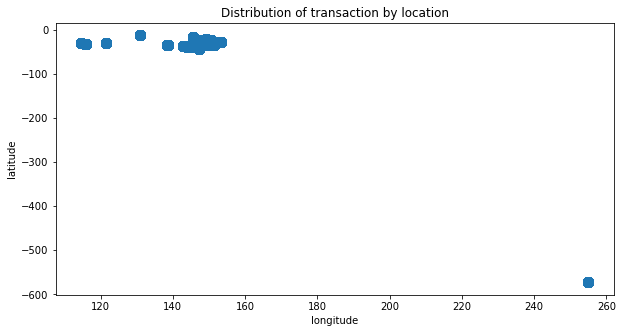

In [190]:
# Lets look at the distribution of the transactions by location
plt.figure(figsize=(10,5))
plt.scatter(df['c_long'],df['c_lat'],s=100);
plt.title("Distribution of transaction by location")
plt.xlabel('longitude')
plt.ylabel('latitude');

>This shows majority of the transactions takes place at a specific location. Lets explore the `merchant_suburb` column which is the only way to close in on this as the data do not have the coordinates in the current format to plot as a geodata.


In [29]:
# Get the top locations by amount of transaction (merchant suburb)
df_suburb=df.groupby(['merchant_suburb']).count()
df_suburb.sort_values('status',ascending=False)

,status,card_present_flag,bpay_biller_code,account,currency,txn_description,merchant_id,merchant_code,first_name,balance,...,country,customer_id,merchant_long_lat,movement,transaction_month,week_num,long,lat,mer_long,mer_lat
merchant_suburb,,,,,,,,,,,,,,,,,,,,,
Melbourne,255,255,0,255,255,255,255,0,255,255,...,255,255,255,255,255,255,255,255,255,255
Sydney,233,233,0,233,233,233,233,0,233,233,...,233,233,233,233,233,233,233,233,233,233
Southport,82,82,0,82,82,82,82,0,82,82,...,82,82,82,82,82,82,82,82,82,82
Brisbane City,79,79,0,79,79,79,79,0,79,79,...,79,79,79,79,79,79,79,79,79,79
Chatswood,55,55,0,55,55,55,55,0,55,55,...,55,55,55,55,55,55,55,55,55,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gerringong,1,1,0,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
Petrie,1,1,0,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
Gepps Cross,1,1,0,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1


>While there are 4,326 missing data on the location of the transaction, the 3 top location for counts of transactions are Melbourne, Sydney and Southport (a distant third from the other two major cities of Australia) 

In [30]:
# Lets look at the volume of transactions by location (using the merchant_suburb column)
amount_loc=df.groupby(['merchant_suburb']).sum()
amount_loc=amount_loc[['amount']]
amount_loc
# # drop the missing values placeholder
# amount_loc.drop(index=['missing'],inplace=True)
amount_loc.sort_values('amount',ascending=False,inplace=True)
amount_loc=amount_loc[:10]

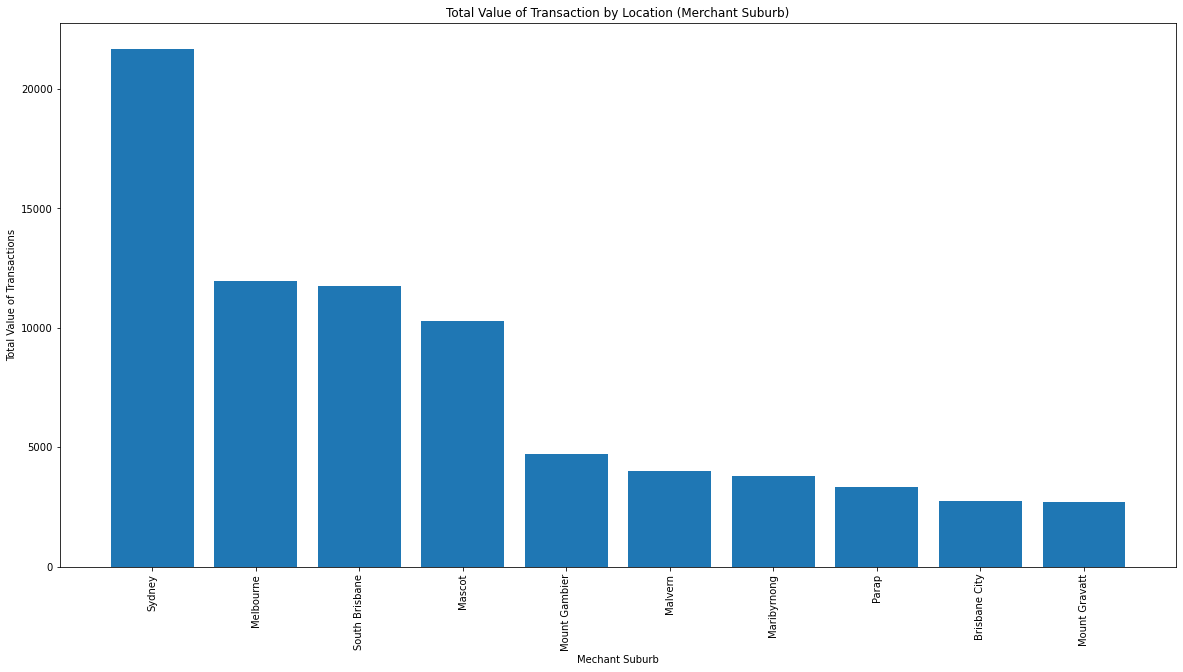

In [31]:
# Plot the total value of transactions by location (using the merchant_suburb column)
plt.figure(figsize=(20,10))
plt.bar(amount_loc.index,amount_loc['amount'])
plt.xticks(rotation=90);
plt.title('Total Value of Transaction by Location (Merchant Suburb)')
plt.xlabel('Mechant Suburb')
plt.ylabel('Total Value of Transactions');

In [32]:
#Get the total transaction per coordinate in the dataset
cord_df=df.groupby(['long','lat'])['amount'].sum()

# Turn the array created to a DataFrame
cord_df =pd.DataFrame(cord_df)
cord_df.head()


,,amount
long,lat,
114.62,-28.80,18810.09
115.72,-32.28,23233.50
115.74,-31.72,23070.56
115.78,-31.90,22141.51
115.79,-31.94,19160.97


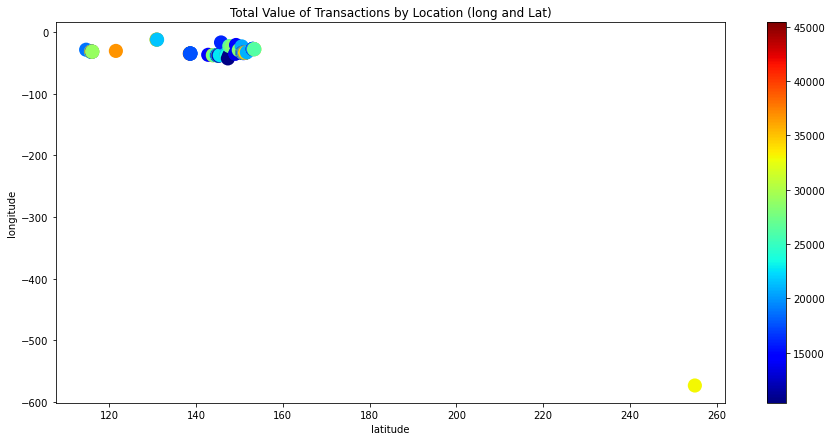

In [33]:
# Plot the total value of transactions by location (using the 'long lat' column)
plt.figure(figsize=(15,7))
points=plt.scatter(cord_df.index.get_level_values('long'),
                   cord_df.index.get_level_values('lat'),
                   c=cord_df['amount'],cmap='jet',lw=0,
                  s=200)
plt.title('Total Value of Transactions by Location (long and Lat)')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.colorbar(points);

### 5. Data cleanup and transformations required e.g treatment of missing data, outliers, index etc.

#### ***Missing data***
To handle the missing values, we will: 
    
>* drop entirely the following columns due to the significant amount of missing values:
    * `merchant_code`
    * `bpay_biller_code`
    
>* fill the following info which are all objects with a string 'missing'
    * `card_present_flag`
    * `merchant_id`
    * `merchant_suburb`
    * `merchant_state`
    * `merchant_long_lat`
 
>* fill the `card_present_flag` with 'zero'. ***We are assuming that any transaction with missing value for card present had no card present on the transaction.***

In [34]:
# Drop the unwanted columns 'merchant_code' and 'bpay_biller_code'
df.drop('merchant_code', axis=1,inplace =True)
df.drop('bpay_biller_code', axis=1,inplace =True)


In [35]:
df.head()

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,gender,age,...,country,customer_id,merchant_long_lat,movement,transaction_month,week_num,long,lat,mer_long,mer_lat
date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,authorized,1.0,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,F,26,...,Australia,CUS-2487424745,153.38 -27.99,debit,8,31,153.41,-27.95,153.38,-27.99
2018-08-01,authorized,0.0,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,F,26,...,Australia,CUS-2487424745,151.21 -33.87,debit,8,31,153.41,-27.95,151.21,-33.87
2018-08-01,authorized,1.0,ACC-1222300524,AUD,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,M,38,...,Australia,CUS-2142601169,151.21 -33.87,debit,8,31,151.23,-33.94,151.21,-33.87
2018-08-01,authorized,1.0,ACC-1037050564,AUD,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,F,40,...,Australia,CUS-1614226872,153.05 -26.68,debit,8,31,153.10,-27.66,153.05,-26.68
2018-08-01,authorized,1.0,ACC-1598451071,AUD,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,F,26,...,Australia,CUS-2487424745,153.44 -28.06,debit,8,31,153.41,-27.95,153.44,-28.06


In [36]:
df.columns

Index(['status', 'card_present_flag', 'account', 'currency', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'transaction_month', 'week_num', 'long', 'lat', 'mer_long',
       'mer_lat'],
      dtype='object')

In [37]:
# Fill the missing values with 'missing' apart from card_present_flag which is filled with zero

# fill card_present_flag which is filled with zero
df[['card_present_flag']] = df[['card_present_flag']].fillna(value=0)

# fill other remaining missing values with 'missing'
df = df.fillna(value='missing')


In [38]:
# Confirm they are no more missing values
df.isna().sum()

status               0
card_present_flag    0
account              0
currency             0
txn_description      0
merchant_id          0
first_name           0
balance              0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
country              0
customer_id          0
merchant_long_lat    0
movement             0
transaction_month    0
week_num             0
long                 0
lat                  0
mer_long             0
mer_lat              0
dtype: int64

In [39]:
# Plot a box-plot to see if there are any anormaly/outliers that jumps at us from the dataset.

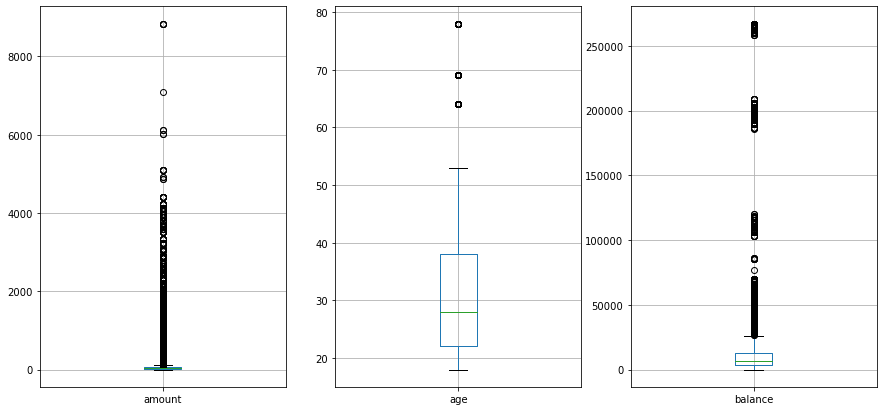

In [40]:
fig ,axes=plt.subplots(1,3,figsize=(15,7))

df_numerical.boxplot(column='amount', ax=axes[0])
df_numerical.boxplot(column='age', ax=axes[1])
df_numerical.boxplot(column='balance', ax=axes[2]);
# plt.xticks(rotation=45)

In [41]:
# Lets compare the median to the mean to assess the effect of the outliers
print(f'Median values: Age: {df_numerical["age"].median():.0f}, Balance: {df_numerical["balance"].median():.2f}, Amount :{df_numerical["amount"].median():.2f}')
print(f'Mean values: Age: {df_numerical["age"].mean():.0f}, Balance: {df_numerical["balance"].mean():.2f}, Amount :{df_numerical["amount"].mean():.2f}')      

Median values: Age: 28, Balance: 6432.01, Amount :29.00
Mean values: Age: 31, Balance: 14704.20, Amount :187.93


>The effect of the outlier can be seen in the massive difference between the median and the mean (the outlier affects the mean)

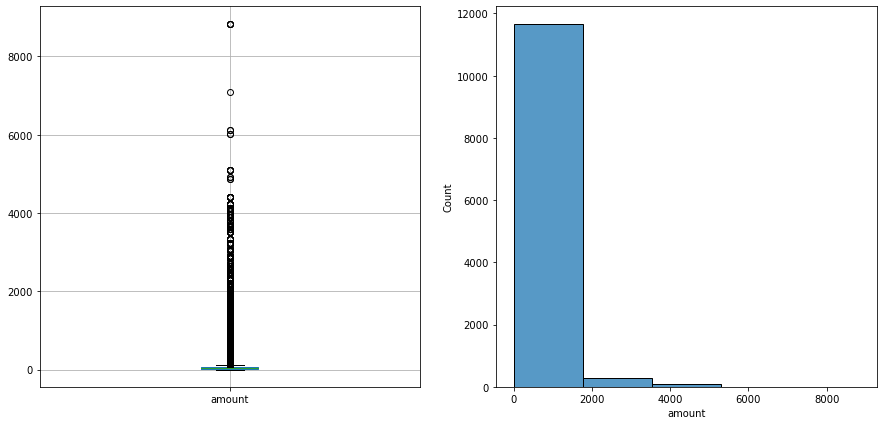

In [42]:
# We will drill down on each feature to determine our action with the outliers.

# Boxplt and histogram distribution of 'amount' column
fig ,axes=plt.subplots(1,2,figsize=(15,7))
df_numerical.boxplot(column='amount', ax=axes[0])
sns.histplot(df_numerical['amount'],bins=5,kde=False,ax=axes[1]);


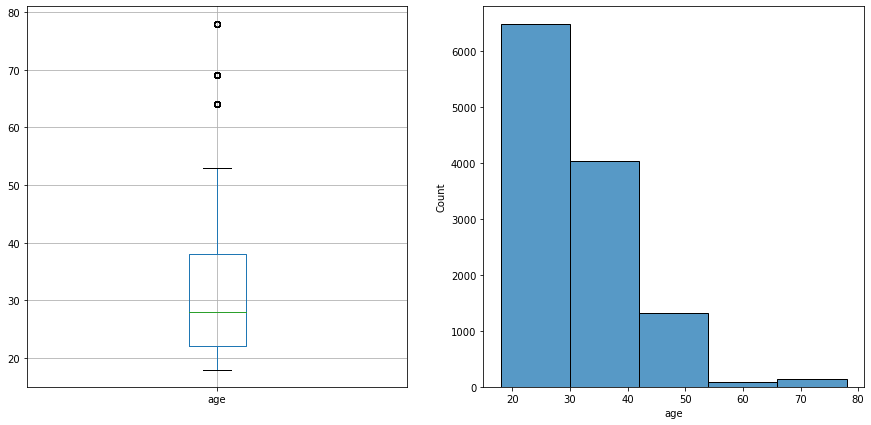

In [43]:
# Boxplt and histogram distribution of 'amount' column
fig ,axes=plt.subplots(1,2,figsize=(15,7))
df_numerical.boxplot(column='age', ax=axes[0])
sns.histplot(df_numerical['age'],bins=5,kde=False,ax=axes[1]);

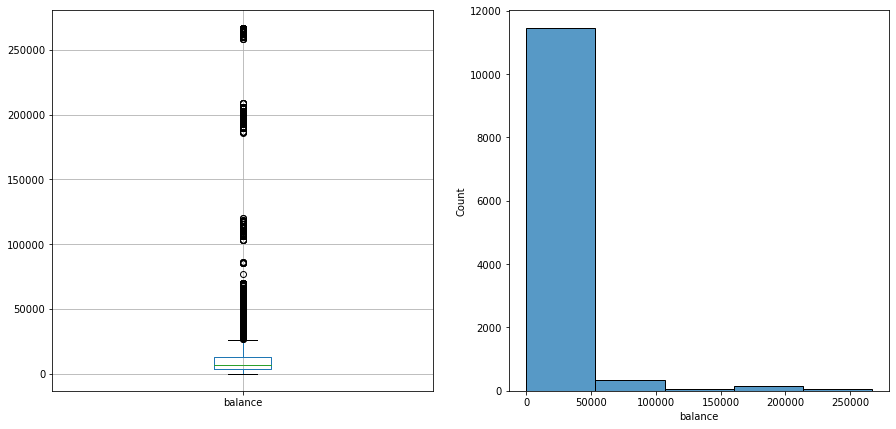

In [44]:
# Boxplt and histogram distribution of 'amount' column
fig ,axes=plt.subplots(1,2,figsize=(15,7))
df_numerical.boxplot(column='balance', ax=axes[0])
sns.histplot(df_numerical['balance'],bins=5,kde=False,ax=axes[1]);

>We can see that majority of the transactions have value just below AUD 2000 and the distribution is highly skewed to the right due to the outlier transactions. 
while the age distribution is also slightly skewed to the right from 50 years and below. 

>Ways to deal with the outliers could be :
  >* Ignore the outliers
   >* Drop the rows with the outliers
   >* Try to convert the distribution to a normal distribution using log, normalization or standardization (z-score)
    
>However, to aid more realistic analysis of the data and having just 12,043 records (note that the more data we have more we are able to get good models from the data) it is better not to reduce this further by dropping the row entirely.
At the same time, the effect of the outlier on the descriptive statistic is significant to just ignore this. So the best solution will be to convert this to a normal distribution by any of the methods above. We would try z-score, log and normalization (MinMaxScaler) to see if this would change the outlier effect.

In [45]:
from scipy import stats
df_zscore = stats.zscore(df_numerical)
df_zscore

,card_present_flag,merchant_code,balance,age,amount
0,NaN,NaN,-0.465641,-0.456138,-0.289724
1,NaN,NaN,-0.466091,-0.456138,-0.293201
2,NaN,NaN,-0.466583,0.738376,-0.306313
3,NaN,NaN,-0.399556,0.937462,-0.248126
4,NaN,NaN,-0.466194,-0.456138,-0.311663
...,...,...,...,...,...
12038,NaN,NaN,-0.020635,-0.057967,-0.300626
12039,NaN,NaN,-0.176698,-1.053395,-0.209363
12040,NaN,NaN,0.974223,-0.257052,-0.242963
12041,NaN,NaN,-0.106453,3.824204,-0.265221


<AxesSubplot:xlabel='balance', ylabel='Count'>

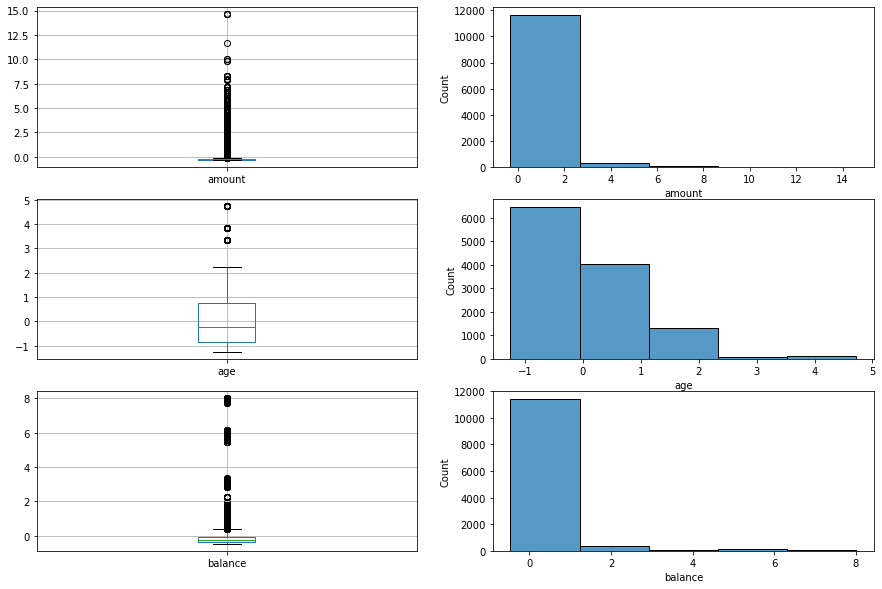

In [46]:
# Let us now see the distribution if anything changed 

# Boxpl0t and histogram distribution of column
fig ,axes=plt.subplots(3,2,figsize=(15,10))
df_zscore.boxplot(column='amount', ax=axes[0,0])
sns.histplot(df_zscore['amount'],bins=5,kde=False,ax=axes[0,1])
df_zscore.boxplot(column='age', ax=axes[1,0])
sns.histplot(df_zscore['age'],bins=5,kde=False,ax=axes[1,1])
df_zscore.boxplot(column='balance', ax=axes[2,0])
sns.histplot(df_zscore['balance'],bins=5,kde=False,ax=axes[2,1])

The zscore help to scale the data but this does not affect the distribution and presence of the outliers.

Let's us try using log to transform the data distribution

In [47]:
# Convert the data to log
df_log = np.log(df_numerical)
df_log

,card_present_flag,merchant_code,balance,age,amount
0,0.0,NaN,3.566429,3.258097,2.788093
1,-inf,NaN,3.054001,3.258097,2.652537
2,0.0,NaN,1.742219,3.637586,1.859418
3,0.0,NaN,7.657859,3.688879,3.711130
4,0.0,NaN,2.887590,3.258097,1.178655
...,...,...,...,...,...
12038,-inf,NaN,9.550672,3.401197,2.281361
12039,0.0,NaN,9.120174,2.995732,4.156850
12040,0.0,NaN,10.723148,3.332205,3.783280
12041,0.0,NaN,9.337032,4.234107,3.426540


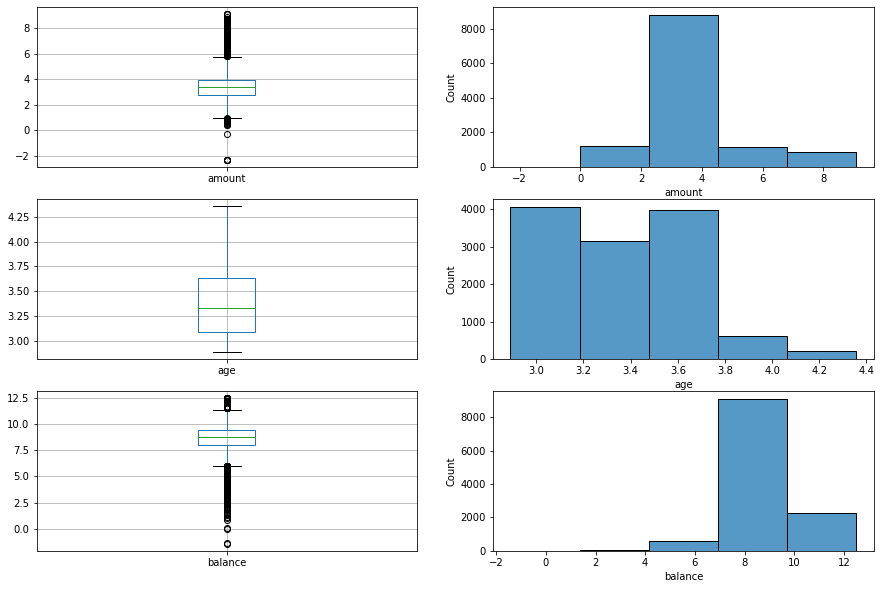

In [48]:
# Plot the log dataframe
fig ,axes=plt.subplots(3,2,figsize=(15,10))
df_log.boxplot(column='amount', ax=axes[0,0])
sns.histplot(df_log['amount'],bins=5,kde=False,ax=axes[0,1])
df_log.boxplot(column='age', ax=axes[1,0])
sns.histplot(df_log['age'],bins=5,kde=False,ax=axes[1,1])
df_log.boxplot(column='balance', ax=axes[2,0])
sns.histplot(df_log['balance'],bins=5,kde=False,ax=axes[2,1]);

The log helps reduce the effect of the outlier (which is completely removed under `age`) however, it seems the the outliers values compared to other values are very significant for a normal distribution to be fully achieved.

Lastly we try to normalize the data to value between 0 and 1

In [49]:
# Import the required module
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df_numerical)
print(scaled)

[[1.00000000e+00            nan 1.31584720e-04 1.33333333e-01
  1.82777494e-03]
 [0.00000000e+00            nan 7.84641746e-05 1.33333333e-01
  1.59463460e-03]
 [1.00000000e+00            nan 2.04770532e-05 3.33333333e-01
  7.15265486e-04]
 ...
 [1.00000000e+00            nan 1.69934572e-01 1.66666667e-01
  4.96385193e-03]
 [1.00000000e+00            nan 4.24905592e-02 8.50000000e-01
  3.47107475e-03]
 [1.00000000e+00            nan 2.06555068e-02 2.16666667e-01
  2.51927369e-03]]


In [50]:
# Convert the array to a dataFrame
df_scaled= pd.DataFrame(scaled,columns=['card_present_flag','merchant_code','balance','age','amount'])
df_scaled.head()

,card_present_flag,merchant_code,balance,age,amount
0,1.0,NaN,0.000132,0.133333,0.001828
1,0.0,NaN,0.000078,0.133333,0.001595
2,1.0,NaN,0.000020,0.333333,0.000715
3,1.0,NaN,0.007925,0.366667,0.004618
4,1.0,NaN,0.000066,0.133333,0.000357


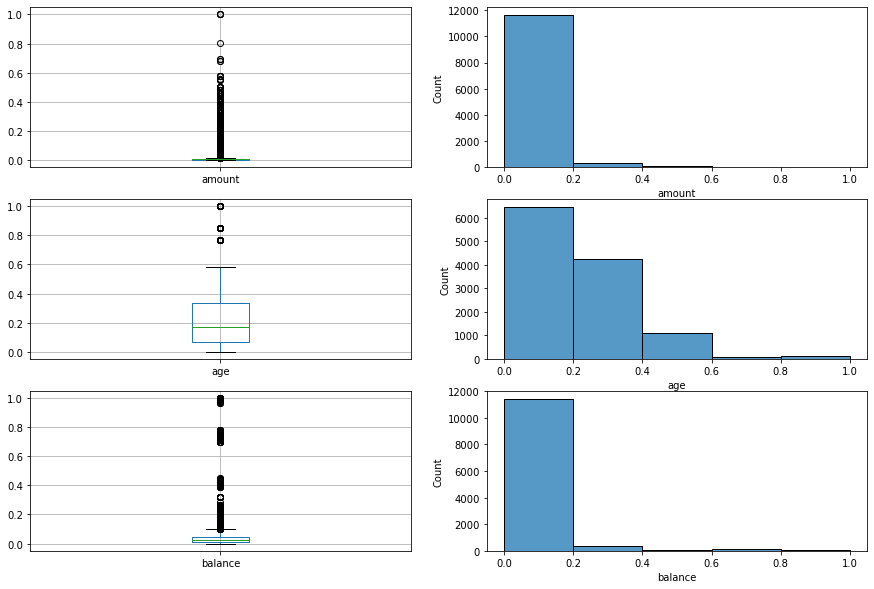

In [51]:
# Plot the normalised dataset
fig ,axes=plt.subplots(3,2,figsize=(15,10))
df_scaled.boxplot(column='amount', ax=axes[0,0])
sns.histplot(df_scaled['amount'],bins=5,kde=False,ax=axes[0,1])
df_scaled.boxplot(column='age', ax=axes[1,0])
sns.histplot(df_scaled['age'],bins=5,kde=False,ax=axes[1,1])
df_scaled.boxplot(column='balance', ax=axes[2,0])
sns.histplot(df_scaled['balance'],bins=5,kde=False,ax=axes[2,1]);

>Just as in the case with the zscore, this normalises the scale but unable to remove the outliers effect.

>To this end, at the moment the outliers will be ignored and its treatment will depend on the type of further analysis or modelling required. For example, for machine learning the normalised data will be used after converting all the catergorical data to numeric as well.

### 6. Get interesting insights /KPIs such as :

    * Average, lowest and/or highest transaction amount
    * Top 10 customers by transaction volumes (spend and count of transactions)
    * Top 10 customers by location
    * Transaction trends per periods (weekly & monthly)- spend, number of customers etc.
    * Any other interesting insights from the data

In [52]:
# Check the number of distinct customers and amount of transactions
unique, counts = np.unique(df['first_name'], return_counts=True)

result = np.column_stack((unique, counts)) 
result[:5]

array([['Abigail', 102],
       ['Alexander', 91],
       ['Amy', 124],
       ['Andrew', 34],
       ['Antonio', 115]], dtype=object)

Text(0, 0.5, 'Number of Transactions')

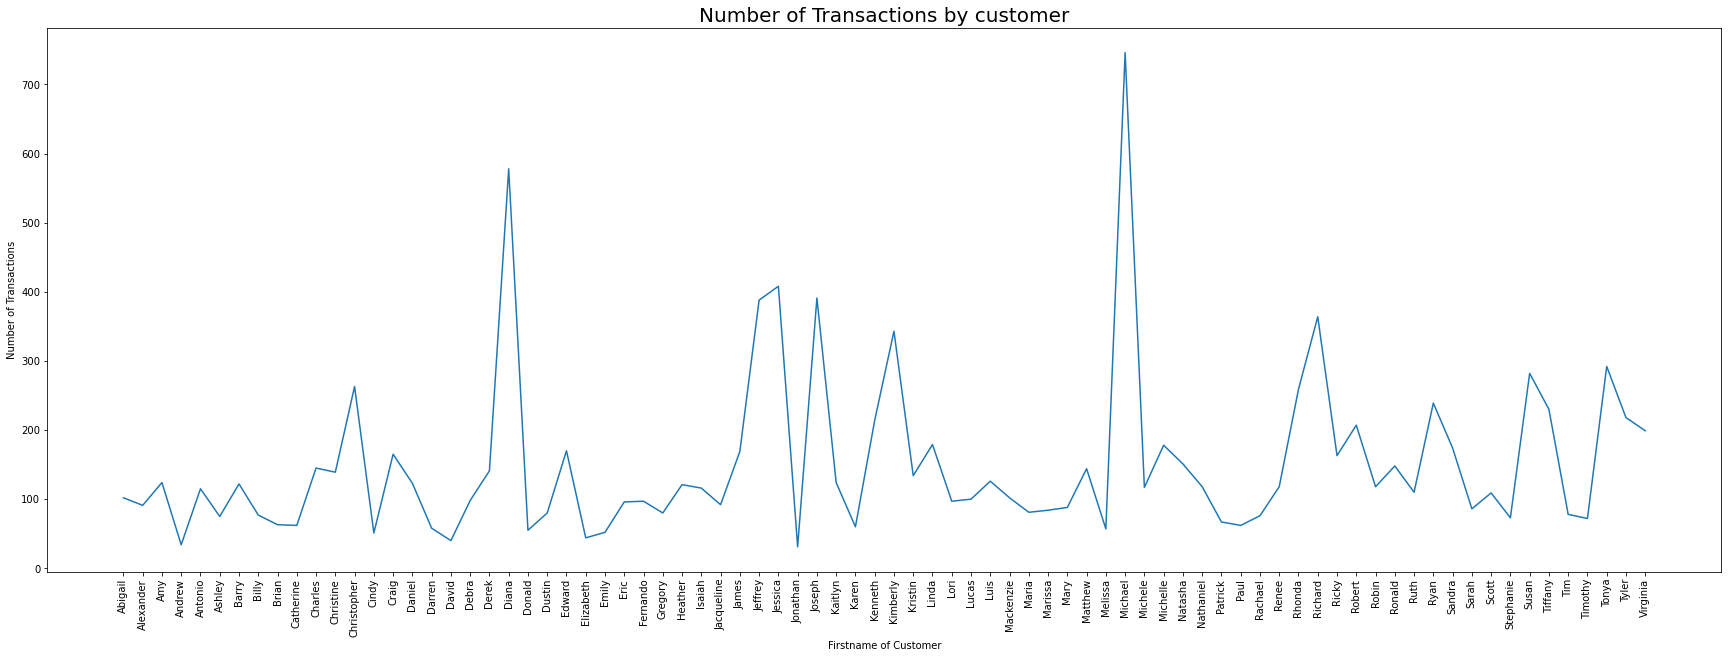

In [53]:
# Visualise the number of transactions by each customer 

# Convert array to DataFrame
results= pd.DataFrame(result)
results.rename(columns={0:"customer",1:"No of Transactions"},inplace =True)
# Plot the DataFrame
plt.figure(figsize=(30,10))
plt.plot(results['customer'],results['No of Transactions'])
plt.title("Number of Transactions by customer",fontdict={'fontsize': 20})
plt.xticks(rotation='vertical');
plt.xlabel('Firstname of Customer')
plt.ylabel('Number of Transactions')

In [54]:
# Find the customers with the highest number of transaction (top 10)
results.sort_values('No of Transactions',ascending =False)[:10]

,customer,No of Transactions
52,Michael,746
20,Diana,578
34,Jessica,408
36,Joseph,391
33,Jeffrey,388
62,Richard,364
40,Kimberly,343
77,Tonya,292
73,Susan,282
12,Christopher,263


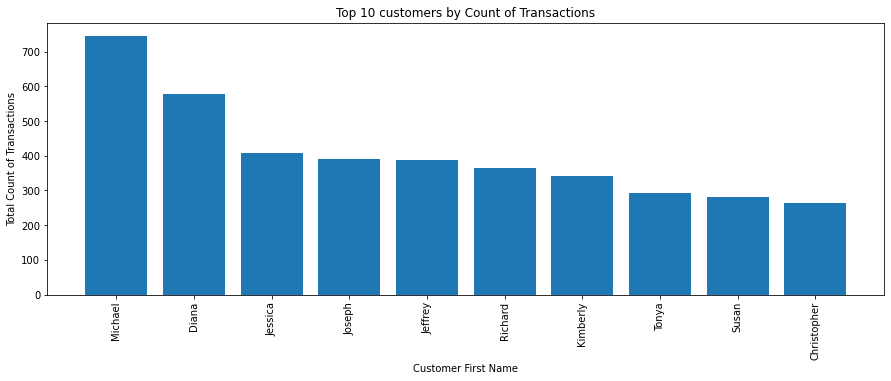

In [55]:
# Plot a bar chart of the top 10 customer by number of transactions
plt.figure(figsize=(15,5))
df_t10_trans_amt=results.sort_values('No of Transactions',ascending =False)[:10]
plt.bar(df_t10_trans_amt['customer'],df_t10_trans_amt['No of Transactions'])
plt.title('Top 10 customers by Count of Transactions')
plt.xlabel('Customer First Name')
plt.ylabel('Total Count of Transactions');
plt.xticks(rotation=90);

In [56]:
# # Find the customer with the highest total transactions amount (top 10)
tot_amt_cust=df.groupby(by='first_name')['amount'].sum()
tot_amt_cust.sort_values(ascending=False, inplace=True)
t10_tot_amt_cust=tot_amt_cust[:10]
t10_tot_amt_cust=pd.DataFrame(t10_tot_amt_cust)
t10_tot_amt_cust                         

,amount
first_name,
Michael,142329.98
Kenneth,82195.29
Jessica,63533.73
Richard,55578.70
Ryan,53408.03
Linda,51807.91
Susan,50452.10
Joseph,44996.17
Kimberly,44853.05


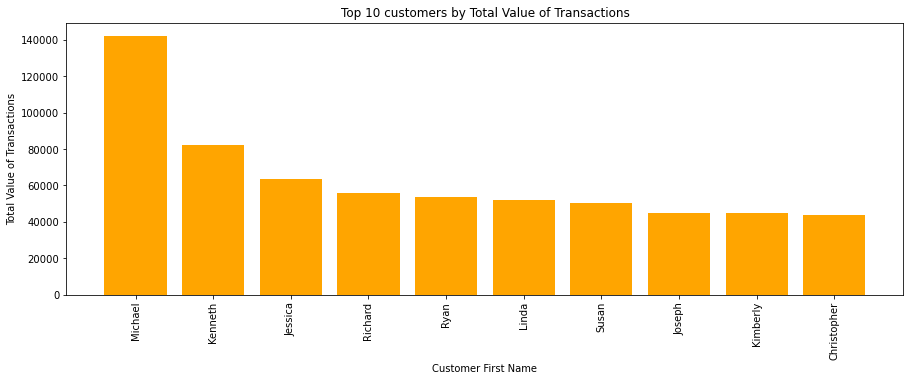

In [69]:
# Plot a bar chart of the top 10 customer by total value of transactions
plt.figure(figsize=(15,5))
plt.bar(t10_tot_amt_cust.index,t10_tot_amt_cust['amount'],color='orange')
plt.title('Top 10 customers by Total Value of Transactions')
plt.xlabel('Customer First Name')
plt.ylabel('Total Value of Transactions');
plt.xticks(rotation=90);

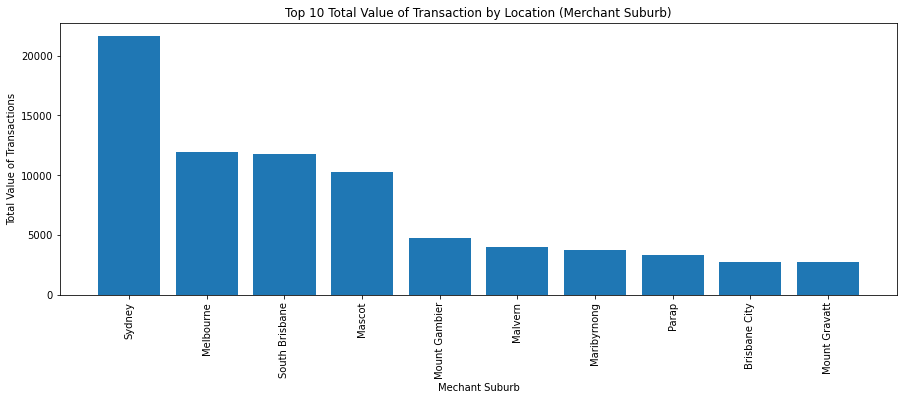

In [58]:
# Plot the top 10 total value of transactions by location (using the merchant_suburb column)
plt.figure(figsize=(15,5))
plt.bar(amount_loc.index,amount_loc['amount'])
plt.xticks(rotation=90);
plt.title('Top 10 Total Value of Transaction by Location (Merchant Suburb)')
plt.xlabel('Mechant Suburb')
plt.ylabel('Total Value of Transactions');

In [59]:

pd.set_option('display.max_rows',5)
df.head()

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,gender,age,...,country,customer_id,merchant_long_lat,movement,transaction_month,week_num,long,lat,mer_long,mer_lat
date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,authorized,1.0,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,F,26,...,Australia,CUS-2487424745,153.38 -27.99,debit,8,31,153.41,-27.95,153.38,-27.99
2018-08-01,authorized,0.0,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,F,26,...,Australia,CUS-2487424745,151.21 -33.87,debit,8,31,153.41,-27.95,151.21,-33.87
2018-08-01,authorized,1.0,ACC-1222300524,AUD,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,M,38,...,Australia,CUS-2142601169,151.21 -33.87,debit,8,31,151.23,-33.94,151.21,-33.87
2018-08-01,authorized,1.0,ACC-1037050564,AUD,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,F,40,...,Australia,CUS-1614226872,153.05 -26.68,debit,8,31,153.10,-27.66,153.05,-26.68
2018-08-01,authorized,1.0,ACC-1598451071,AUD,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,F,26,...,Australia,CUS-2487424745,153.44 -28.06,debit,8,31,153.41,-27.95,153.44,-28.06


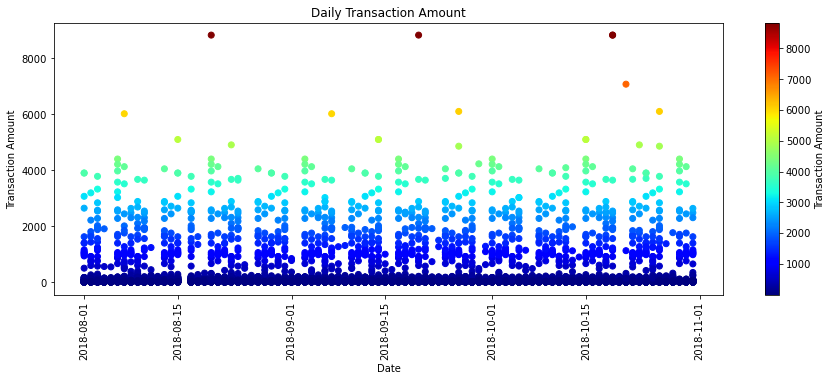

In [60]:
# Visualise some selected features of interest and their relationships 

# value of transactions per Period (Daily)
plt.figure(figsize=(15,5))
y = df['amount']
x= df.index
plt.scatter(x,y,c=y,cmap='jet')
plt.colorbar(label='Transaction Amount')
plt.title('Daily Transaction Amount')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=90);

> The daily pattern of transactions seems to be similar across the three months. This would be due to monthly recurring transactions. The highest transaction amounts also occur at similar times in each month (3 points at the top of the plot)

In [61]:
# Weekly average transactions
week_average=df.groupby(by='week_num').mean()
week_average.head()

,card_present_flag,balance,age,amount,transaction_month,long,lat
week_num,,,,,,,
31,0.534639,11116.058886,30.974398,151.315346,8.000000,145.597364,-45.690783
32,0.524609,10117.965839,31.321029,191.737796,8.000000,143.323658,-35.137897
33,0.514539,10897.896005,29.656131,180.216372,8.000000,144.071264,-39.786789
34,0.523913,10149.812446,30.368478,189.795859,8.000000,142.191750,-36.796457
35,0.521277,11856.020968,29.667021,162.706660,8.282979,142.624436,-41.515372


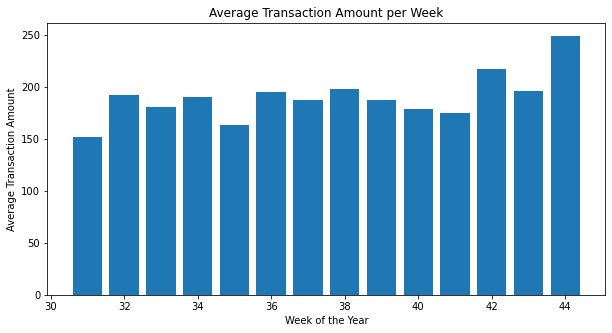

In [62]:
# Plot a bar chart of the average transaction amount per week
plt.figure(figsize=(10,5))
plt.bar(week_average.index,week_average.amount)
plt.title('Average Transaction Amount per Week')
plt.xlabel('Week of the Year')
plt.ylabel('Average Transaction Amount');

In [63]:
# Monthly average transactions
month_average=df.groupby(by='transaction_month').mean()
month_average.head()

,card_present_flag,balance,age,amount,week_num,long,lat
transaction_month,,,,,,,
8,0.517626,10794.148620,30.482881,185.121867,33.011666,143.378093,-39.008390
9,0.518066,14730.151136,30.533516,182.045903,37.336656,144.289748,-39.371575
10,0.507463,18450.991566,30.726205,196.427323,41.69978,143.279927,-36.164673


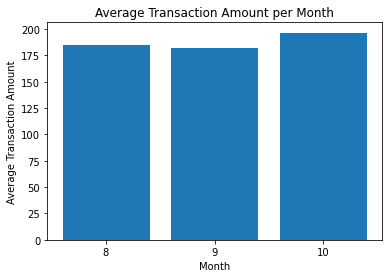

In [64]:
# Plot a bar chart of the average transaction amount per month
# plt.figure(figsize=(10,5))
plt.bar(month_average.index,month_average.amount);
plt.xticks([8,9,10])
plt.xlabel('Month')
plt.ylabel('Average Transaction Amount')
plt.title("Average Transaction Amount per Month");


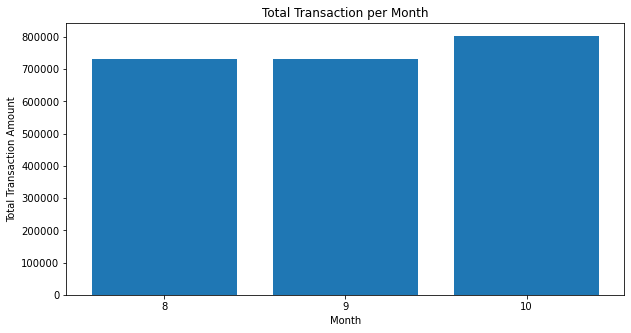

In [65]:
total_per_month=df.groupby(['transaction_month'])['amount'].sum()
plt.figure(figsize=(10,5))
total_per_month=pd.DataFrame(total_per_month)
plt.bar(total_per_month.index,total_per_month['amount']);
plt.xticks([8,9,10])
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.title("Total Transaction per Month");

In [66]:
# Total transactions by type (debit or credit)
Trn_type_count=df.groupby('movement').count()
Trn_type_count=Trn_type_count['status']
Trn_type_count=pd.DataFrame(Trn_type_count)
Trn_type_count.rename(columns={'status':'No of Transactions'},inplace=True)
Trn_type_count

,No of Transactions
movement,
credit,883
debit,11160


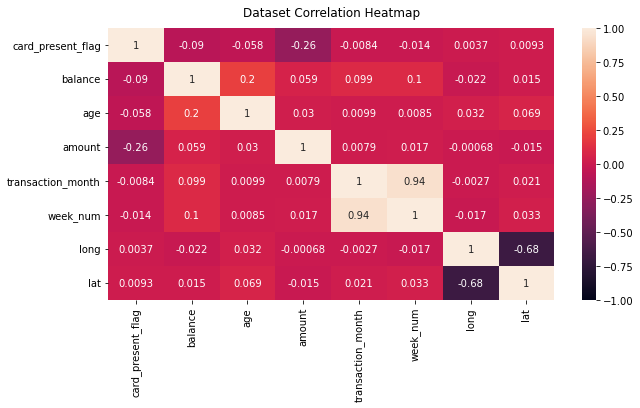

In [67]:
# Finally we check how all the features are correlated with each other
plt.figure(figsize=(10,5))
heatmap=sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True);
heatmap.set_title('Dataset Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

This shoulds there is hardly any directly correlation with the data set except from the engineered features (week_num,transaction_month,long & lat)